PRUEBAS CLUSTERING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("/content/IBEX35_cotizaciones_20_Limpio.csv", sep=",")
df

,Fecha,Empresa,Precio_cierre
0,NaN,NaN,NaN
1,2005-04-01,ACCIONA,36.337158
2,2005-04-04,ACCIONA,35.794037
3,2005-04-05,ACCIONA,36.233715
4,2005-04-06,ACCIONA,36.388882
...,...,...,...
151101,2025-03-26,UNICAJA BANCO,1.774000
151102,2025-03-27,UNICAJA BANCO,1.749000
151103,2025-03-28,UNICAJA BANCO,1.710000
151104,2025-03-31,UNICAJA BANCO,1.706000


In [44]:
df['Empresa'].unique()

array([nan, 'ACCIONA', 'ACCIONA ENERGÍA', 'ACERINOX', 'ACS', 'AENA',
       'AMADEUS', 'ARCELORMITTAL', 'BANKINTER', 'BBVA', 'CAIXABANK',
       'CELLNEX TELECOM', 'ENAGAS', 'ENDESA', 'FERROVIAL', 'FLUIDRA',
       'GRIFOLS', 'IAG', 'IBERDROLA', 'INDITEX', 'INDRA', 'INM. COLONIAL',
       'LABORATORIOS FARMA (ROVI)', 'LOGISTA', 'MAPFRE',
       'MERLIN PROPERTIES', 'NATURGY', 'PUIG', 'REE', 'REPSOL',
       'SABADELL', 'SACYR', 'SANTANDER', 'SOLARIA ENERGIA', 'TELEFONICA',
       'UNICAJA BANCO'], dtype=object)

In [ ]:
df_ACCIONA = df[df["Empresa"] == "ACCIONA"]
df_ACCIONA_ENERGÍA = df[df["Empresa"] == "ACCIONA ENERGÍA"]
df_ACERINOX = df[df["Empresa"] == "ACERINOX"]
df_AENA = df[df["Empresa"] == "AENA"]
df_AMADEUS = df[df["Empresa"] == "AMADEUS"]
df_ARCELORMITTAL = df[df["Empresa"] == "ARCELORMITTAL"]
df_BANKINTER = df[df["Empresa"] == "BANKINTER"]
df_BBVA = df[df["Empresa"] == "BBVA"]
df_CAIXABANK = df[df["Empresa"] == "CAIXABANK"]
df_CELLNEX_TELECOM = df[df["Empresa"] == "CELLNEX TELECOM"]
df_ENAGAS = df[df["Empresa"] == "ENAGAS"]
df_ENDESA = df[df["Empresa"] == "ENDESA"]
df_FERROVIAL = df[df["Empresa"] == "FERROVIAL"]
df_FLUIDRA = df[df["Empresa"] == "FLUIDRA"]
df_GRIFOLS = df[df["Empresa"] == "GRIFOLS"]
df_IAG = df[df["Empresa"] == "IAG"]
df_IBERDROLA = df[df["Empresa"] == "IBERDROLA"]
df_INDITEX = df[df["Empresa"] == "INDITEX"]
df_INDRA = df[df["Empresa"] == "INDRA"]
df_INM_COLONIAL = df[df["Empresa"] == "INM. COLONIAL"]
df_LABORATORIOS_FARMA_ROVI = df[df["Empresa"] == "LABORATORIOS FARMA (ROVI)"]
df_LOGISTA = df[df["Empresa"] == "LOGISTA"]
df_MAPFRE = df[df["Empresa"] == "MAPFRE"]
df_MERLIN_PROPERTIES = df[df["Empresa"] == "MERLIN PROPERTIES"]
df_NATURGY = df[df["Empresa"] == "NATURGY"]
df_PUIG = df[df["Empresa"] == "PUIG"]
df_REE = df[df["Empresa"] == "REE"]
df_REPSOL = df[df["Empresa"] == "REPSOL"]
df_SABADELL = df[df["Empresa"] == "SABADELL"]
df_SACYR = df[df["Empresa"] == "SACYR"]
df_SANTANDER = df[df["Empresa"] == "SANTANDER"]
df_SOLARIA_ENERGIA = df[df["Empresa"] == "SOLARIA ENERGIA"]
df_TELEFONICA = df[df["Empresa"] == "TELEFONICA"]
df_UNICAJA_BANCO = df[df["Empresa"] == "UNICAJA BANCO"]



In [ ]:
# Crear un diccionario que asocie el nombre de la empresa al DataFrame correspondiente
empresas = [
    "ACCIONA", "ACCIONA ENERGÍA", "ACERINOX", "AENA", "AMADEUS", "ARCELORMITTAL",
    "BANKINTER", "BBVA", "CAIXABANK", "CELLNEX TELECOM", "ENAGAS", "ENDESA",
    "FERROVIAL", "FLUIDRA", "GRIFOLS", "IAG", "IBERDROLA", "INDITEX", "INDRA",
    "INM. COLONIAL", "LABORATORIOS FARMA (ROVI)", "LOGISTA", "MAPFRE",
    "MERLIN PROPERTIES", "NATURGY", "PUIG", "REE", "REPSOL", "SABADELL",
    "SACYR", "SANTANDER", "SOLARIA ENERGIA", "TELEFONICA", "UNICAJA BANCO"
]

# Crear el diccionario
dfs_empresas = {empresa: df[df["Empresa"] == empresa] for empresa in empresas}


In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

# Crear un dataframe vacío para guardar los features
features = pd.DataFrame(columns=["Empresa", "mean", "std", "skew", "kurtosis", "min", "max"])

for empresa, df_empresa in dfs_empresas.items():
    precios_cierre = df_empresa["Precio_cierre"].values  # Asegúrate que la columna se llama "Cierre"

    feature_vector = {
        "Empresa": empresa,
        "mean": np.mean(precios_cierre),
        "std": np.std(precios_cierre),
        "skew": skew(precios_cierre),
        "kurtosis": kurtosis(precios_cierre),
        "min": np.min(precios_cierre),
        "max": np.max(precios_cierre)
    }

    # Instead of append, use concat to add the new row
    features = pd.concat([features, pd.DataFrame([feature_vector])], ignore_index=True)

features.set_index('Empresa', inplace=True)


<ipython-input-8-bafeb5c75daf>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features = pd.concat([features, pd.DataFrame([feature_vector])], ignore_index=True)


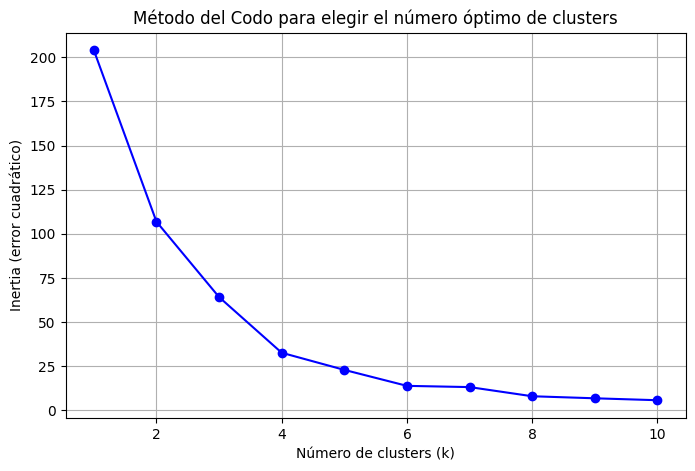

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Número máximo de clusters que quieres probar (por ejemplo, de 1 a 10)
rango_clusters = range(1, 11)

# Lista para guardar el error cuadrático (inertia) de cada KMeans
inertias = []

# Calcular el modelo para cada número de clusters
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled son los features normalizados
    inertias.append(kmeans.inertia_)

# Dibujar el diagrama de codo
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia (error cuadrático)')
plt.title('Método del Codo para elegir el número óptimo de clusters')
plt.grid(True)
plt.show()


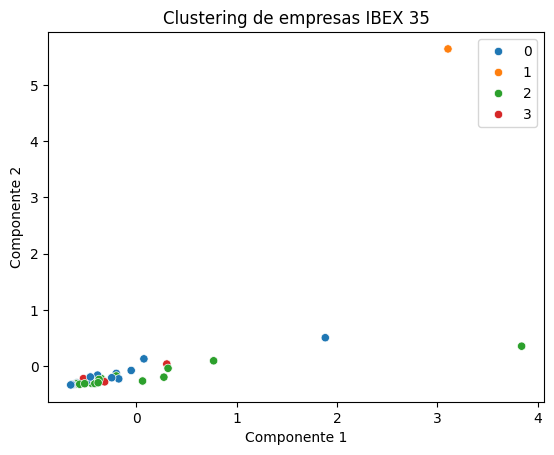

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Añadir los clusters a los features
features['Cluster'] = labels

# Visualizar
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette="tab10")
plt.title('Clustering de empresas IBEX 35')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


In [ ]:
# Crear una tabla con Empresa y su cluster asignado
tabla_clusters = features[['Cluster']].reset_index()

# Mostrar la tabla
print(tabla_clusters)


                      Empresa  Cluster
0                     ACCIONA        0
1             ACCIONA ENERGÍA        2
2                    ACERINOX        2
3                        AENA        2
4                     AMADEUS        2
5               ARCELORMITTAL        3
6                   BANKINTER        0
7                        BBVA        3
8                   CAIXABANK        3
9             CELLNEX TELECOM        2
10                     ENAGAS        2
11                     ENDESA        2
12                  FERROVIAL        0
13                    FLUIDRA        0
14                    GRIFOLS        2
15                        IAG        2
16                  IBERDROLA        0
17                    INDITEX        0
18                      INDRA        3
19              INM. COLONIAL        1
20  LABORATORIOS FARMA (ROVI)        0
21                    LOGISTA        0
22                     MAPFRE        0
23          MERLIN PROPERTIES        2
24                    NAT

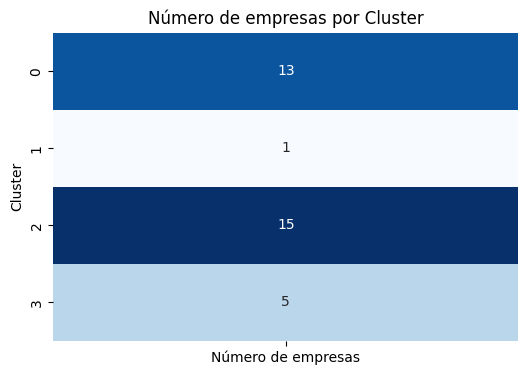

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar cuántas empresas hay en cada cluster
conteo_clusters = tabla_clusters['Cluster'].value_counts().sort_index()

# Crear un pequeño dataframe para visualizar
df_conteo = conteo_clusters.reset_index()
df_conteo.columns = ['Cluster', 'Número de empresas']

# Dibujar un heatmap sencillo
plt.figure(figsize=(6,4))
sns.heatmap(df_conteo.pivot_table(values='Número de empresas', index='Cluster'),
            annot=True, cmap="Blues", fmt='g', cbar=False)  # Changed fmt to 'g'
plt.title('Número de empresas por Cluster')
plt.ylabel('Cluster')
plt.xlabel('')
plt.show()


In [ ]:
# Crear un diccionario para cada cluster
empresas_por_cluster = {i: [] for i in range(4)}  # Asumimos 4 clusters: 0,1,2,3

# Llenarlo recorriendo la tabla
for _, fila in tabla_clusters.iterrows():
    empresa = fila['Empresa']
    cluster = fila['Cluster']
    empresas_por_cluster[cluster].append(empresa)

# Mostrar las empresas en cada cluster
for cluster_id, empresas in empresas_por_cluster.items():
    print(f"\nCluster {cluster_id}:")
    print(empresas)



Cluster 0:
['ACCIONA', 'BANKINTER', 'FERROVIAL', 'FLUIDRA', 'IBERDROLA', 'INDITEX', 'LABORATORIOS FARMA (ROVI)', 'LOGISTA', 'MAPFRE', 'NATURGY', 'SABADELL', 'SOLARIA ENERGIA', 'UNICAJA BANCO']

Cluster 1:
['INM. COLONIAL']

Cluster 2:
['ACCIONA ENERGÍA', 'ACERINOX', 'AENA', 'AMADEUS', 'CELLNEX TELECOM', 'ENAGAS', 'ENDESA', 'GRIFOLS', 'IAG', 'MERLIN PROPERTIES', 'PUIG', 'REE', 'REPSOL', 'SANTANDER', 'TELEFONICA']

Cluster 3:
['ARCELORMITTAL', 'BBVA', 'CAIXABANK', 'INDRA', 'SACYR']


CLUSTER 0

['ACCIONA' 'BANKINTER' 'FERROVIAL' 'FLUIDRA' 'IBERDROLA' 'INDITEX'
 'LABORATORIOS FARMA (ROVI)' 'LOGISTA' 'MAPFRE' 'NATURGY' 'SABADELL'
 'SOLARIA ENERGIA' 'UNICAJA BANCO']

In [ ]:
df_ACCIONA = df[df["Empresa"] == "ACCIONA"]
df_BANKINTER = df[df["Empresa"] == "BANKINTER"]
df_FERROVIAL = df[df["Empresa"] == "FERROVIAL"]
df_FLUIDRA = df[df["Empresa"] == "FLUIDRA"]
df_IBERDROLA = df[df["Empresa"] == "IBERDROLA"]
df_INDITEX = df[df["Empresa"] == "INDITEX"]
df_LABORATORIOS_FARMA_ROVI = df[df["Empresa"] == "LABORATORIOS FARMA (ROVI)"]
df_LOGISTA = df[df["Empresa"] == "LOGISTA"]
df_MAPFRE = df[df["Empresa"] == "MAPFRE"]
df_NATURGY = df[df["Empresa"] == "NATURGY"]
df_SABADELL = df[df["Empresa"] == "SABADELL"]
df_SOLARIA_ENERGIA = df[df["Empresa"] == "SOLARIA ENERGIA"]
df_UNICAJA_BANCO = df[df["Empresa"] == "UNICAJA BANCO"]

In [ ]:
df_ACCIONA['Fecha'] = pd.to_datetime(df_ACCIONA['Fecha'], errors='coerce')
df_BANKINTER['Fecha'] = pd.to_datetime(df_BANKINTER['Fecha'], errors='coerce')
df_FERROVIAL['Fecha'] = pd.to_datetime(df_FERROVIAL['Fecha'], errors='coerce')
df_FLUIDRA['Fecha'] = pd.to_datetime(df_FLUIDRA['Fecha'], errors='coerce')
df_IBERDROLA['Fecha'] = pd.to_datetime(df_IBERDROLA['Fecha'], errors='coerce')
df_INDITEX['Fecha'] = pd.to_datetime(df_INDITEX['Fecha'], errors='coerce')
df_LABORATORIOS_FARMA_ROVI['Fecha'] = pd.to_datetime(df_LABORATORIOS_FARMA_ROVI['Fecha'], errors='coerce')
df_LOGISTA['Fecha'] = pd.to_datetime(df_LOGISTA['Fecha'], errors='coerce')
df_MAPFRE['Fecha'] = pd.to_datetime(df_MAPFRE['Fecha'], errors='coerce')
df_NATURGY['Fecha'] = pd.to_datetime(df_NATURGY['Fecha'], errors='coerce')
df_SABADELL['Fecha'] = pd.to_datetime(df_SABADELL['Fecha'], errors='coerce')
df_SOLARIA_ENERGIA['Fecha'] = pd.to_datetime(df_SOLARIA_ENERGIA['Fecha'], errors='coerce')
df_UNICAJA_BANCO['Fecha'] = pd.to_datetime(df_UNICAJA_BANCO['Fecha'], errors='coerce')

<ipython-input-18-cf7cd6e93886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ACCIONA['Fecha'] = pd.to_datetime(df_ACCIONA['Fecha'], errors='coerce')
<ipython-input-18-cf7cd6e93886>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANKINTER['Fecha'] = pd.to_datetime(df_BANKINTER['Fecha'], errors='coerce')
<ipython-input-18-cf7cd6e93886>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
#Seleccionar solo las columnas necesarias y establecer el índice
df_ACCIONA = df_ACCIONA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_BANKINTER = df_BANKINTER[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_FERROVIAL = df_FERROVIAL[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_FLUIDRA = df_FLUIDRA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_IBERDROLA = df_IBERDROLA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_INDITEX = df_INDITEX[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_LABORATORIOS_FARMA_ROVI = df_LABORATORIOS_FARMA_ROVI[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_LOGISTA = df_LOGISTA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_MAPFRE = df_MAPFRE[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_NATURGY = df_NATURGY[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_SABADELL = df_SABADELL[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_SOLARIA_ENERGIA = df_SOLARIA_ENERGIA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_UNICAJA_BANCO = df_UNICAJA_BANCO[['Fecha', 'Precio_cierre']].set_index('Fecha')

In [ ]:
df_ACCIONA['Precio_cierre'] = pd.to_numeric(df_ACCIONA['Precio_cierre'], errors='coerce')
df_BANKINTER['Precio_cierre'] = pd.to_numeric(df_BANKINTER['Precio_cierre'], errors='coerce')
df_FERROVIAL['Precio_cierre'] = pd.to_numeric(df_FERROVIAL['Precio_cierre'], errors='coerce')
df_FLUIDRA['Precio_cierre'] = pd.to_numeric(df_FLUIDRA['Precio_cierre'], errors='coerce')
df_IBERDROLA['Precio_cierre'] = pd.to_numeric(df_IBERDROLA['Precio_cierre'], errors='coerce')
df_INDITEX['Precio_cierre'] = pd.to_numeric(df_INDITEX['Precio_cierre'], errors='coerce')
df_LABORATORIOS_FARMA_ROVI['Precio_cierre'] = pd.to_numeric(df_LABORATORIOS_FARMA_ROVI['Precio_cierre'], errors='coerce')
df_LOGISTA['Precio_cierre'] = pd.to_numeric(df_LOGISTA['Precio_cierre'], errors='coerce')
df_MAPFRE['Precio_cierre'] = pd.to_numeric(df_MAPFRE['Precio_cierre'], errors='coerce')
df_NATURGY['Precio_cierre'] = pd.to_numeric(df_NATURGY['Precio_cierre'], errors='coerce')
df_SABADELL['Precio_cierre'] = pd.to_numeric(df_SABADELL['Precio_cierre'], errors='coerce')
df_SOLARIA_ENERGIA['Precio_cierre'] = pd.to_numeric(df_SOLARIA_ENERGIA['Precio_cierre'], errors='coerce')
df_UNICAJA_BANCO['Precio_cierre'] = pd.to_numeric(df_UNICAJA_BANCO['Precio_cierre'], errors='coerce')

In [ ]:
import plotly.graph_objects as go

# Crear figura
fig = go.Figure()

# Lista de todos los dataframes y sus nombres
dfs = [
    (df_ACCIONA, "ACCIONA"),
    (df_BANKINTER, "BANKINTER"),
    (df_FERROVIAL, "FERROVIAL"),
    (df_FLUIDRA, "FLUIDRA"),
    (df_IBERDROLA, "IBERDROLA"),
    (df_INDITEX, "INDITEX"),
    (df_LABORATORIOS_FARMA_ROVI, "LABORATORIOS FARMA (ROVI)"),
    (df_LOGISTA, "LOGISTA"),
    (df_MAPFRE, "MAPFRE"),
    (df_NATURGY, "NATURGY"),
    (df_SABADELL, "SABADELL"),
    (df_SOLARIA_ENERGIA, "SOLARIA ENERGIA"),
    (df_UNICAJA_BANCO, "UNICAJA BANCO")
]

# Añadir cada serie al gráfico
for df, nombre in dfs:
    fig.add_trace(go.Scatter(x=df.index, y=df['Precio_cierre'], mode='lines', name=nombre))

# Personalizar la figura
fig.update_layout(
    title="Precios de Cierre de Empresas",
    xaxis_title="Fecha",
    yaxis_title="Precio Cierre",
    legend_title="Empresas",
    hovermode="x unified",
    width=1200,
    height=700
)

# Mostrar
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Lista de todos los dataframes
cluster0 = [df_ACCIONA, df_BANKINTER, df_FERROVIAL, df_FLUIDRA, df_IBERDROLA, df_INDITEX,
            df_LABORATORIOS_FARMA_ROVI, df_LOGISTA, df_MAPFRE, df_NATURGY, df_SABADELL, df_SOLARIA_ENERGIA, df_UNICAJA_BANCO]

# Bucle para añadir columnas de tiempo
for df in cluster0:
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week

for df in cluster0:
    df['Precio_cierre_lag1'] = df['Precio_cierre'].shift(1)
    df['year_lag1'] = df['year'].shift(1)
    df['month_lag1'] = df['month'].shift(1)
    df['quarter_lag1'] = df['quarter'].shift(1)
    df['day_of_week_lag1'] = df['day_of_week'].shift(1)
    df['week_of_year_lag1'] = df['week_of_year'].shift(1)

# Bucle para calcular medias y desviaciones móviles
for df in cluster0:
    # Ventanas de tiempo
    for window in [7, 30, 60]:
        df[f'rolling_mean_{window}'] = df['Precio_cierre'].shift(1).rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df['Precio_cierre'].shift(1).rolling(window=window).std()



In [ ]:
for df in cluster0:
    df.dropna(inplace=True)

In [ ]:
# Definir fecha de corte
fecha_test = '2022-04-01'

# Recorrer cada DataFrame en la lista
for idx, df in enumerate(cluster0):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Imprimir los resultados de la división
    print(f"DataFrame {idx+1}:")
    print(f"Train: {train.index.min().date()} → {train.index.max().date()}")
    print(f"Test : {test.index.min().date()} → {test.index.max().date()}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print("-" * 50)

DataFrame 1:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train shape: (4288,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 2:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train shape: (4288,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 3:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train shape: (4288,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 4:
Train: 2008-01-29 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (3623, 18), y_train shape: (3623,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 5:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train sh

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500)  # Red neuronal
}

# Hiperparámetros
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

# Función para evaluar los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    model_rmse = {}

    for model_name, model in models.items():
        print(f"\nEntrenando {model_name}...")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='neg_root_mean_squared_error',
            cv=3,
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_

        print(f"Mejor RMSE (CV) para {model_name}: {best_score:.4f}")

        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en test para {model_name}: {rmse:.4f}")

        model_rmse[model_name] = rmse

    return model_rmse

# Guardar RMSE medios por modelo
model_rmse_mean = {model_name: [] for model_name in models.keys()}

# Recorrer cada DataFrame en la lista cluster0
for idx, df in enumerate(cluster0):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar los modelos para la serie
    print(f"\nEvaluando modelos para la serie {idx + 1}...")
    model_rmse = evaluate_models(
        X_train_scaled, y_train, X_test_scaled, y_test,
        models, param_grids
    )

    # Guardar RMSE para cada modelo
    for model_name, rmse in model_rmse.items():
        model_rmse_mean[model_name].append(rmse)

# Calcular RMSE medio para cada modelo
mean_rmse = {model_name: np.mean(rmses) for model_name, rmses in model_rmse_mean.items()}

# Seleccionar el modelo con menor RMSE medio
best_model_name = min(mean_rmse, key=mean_rmse.get)
print(f"\n✅ El mejor modelo es: {best_model_name} con RMSE medio = {mean_rmse[best_model_name]:.4f}")




Evaluando modelos para la serie 1...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 1.4031
RMSE en test para Linear Regression: 2.3630

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 4.4820
RMSE en test para Decision Tree: 11.9097

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 3.7629
RMSE en test para Random Forest: 11.6017

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 3.8346
RMSE en test para Gradient Boosting: 12.0450

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 3.8222
RMSE en test para XGBoost: 12.5925

Entrenando SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejor RMSE

CLUSTER 1

Cluster 1:
['INM. COLONIAL']


In [6]:
df_INM = df[df["Empresa"] == "INM. COLONIAL"]

In [7]:
df_INM['Fecha'] = pd.to_datetime(df_INM['Fecha'], errors='coerce')

<ipython-input-7-10c481c7c0f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_INM['Fecha'] = pd.to_datetime(df_INM['Fecha'], errors='coerce')


In [8]:
df_INM = df_INM[['Fecha', 'Precio_cierre']].set_index('Fecha')

In [9]:
df_INM['Precio_cierre'] = pd.to_numeric(df_INM['Precio_cierre'], errors='coerce')

In [10]:
# Lista de todos los dataframes
cluster1 = [df_INM]

# Bucle para añadir columnas de tiempo
for df in cluster1:
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week

for df in cluster1:
    df['Precio_cierre_lag1'] = df['Precio_cierre'].shift(1)
    df['year_lag1'] = df['year'].shift(1)
    df['month_lag1'] = df['month'].shift(1)
    df['quarter_lag1'] = df['quarter'].shift(1)
    df['day_of_week_lag1'] = df['day_of_week'].shift(1)
    df['week_of_year_lag1'] = df['week_of_year'].shift(1)

# Bucle para calcular medias y desviaciones móviles
for df in cluster1:
    # Ventanas de tiempo
    for window in [7, 30, 60]:
        df[f'rolling_mean_{window}'] = df['Precio_cierre'].shift(1).rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df['Precio_cierre'].shift(1).rolling(window=window).std()


In [11]:
for df in cluster1:
    df.dropna(inplace=True)

In [12]:
# Definir fecha de corte
fecha_test = '2022-04-01'

# Recorrer cada DataFrame en la lista
for idx, df in enumerate(cluster1):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Imprimir los resultados de la división
    print(f"DataFrame {idx+1}:")
    print(f"Train: {train.index.min().date()} → {train.index.max().date()}")
    print(f"Test : {test.index.min().date()} → {test.index.max().date()}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print("-" * 50)

DataFrame 1:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train shape: (4288,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500)  # Red neuronal
}

# Hiperparámetros
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

# Función para evaluar los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    model_rmse = {}

    for model_name, model in models.items():
        print(f"\nEntrenando {model_name}...")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='neg_root_mean_squared_error',
            cv=3,
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_

        print(f"Mejor RMSE (CV) para {model_name}: {best_score:.4f}")

        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en test para {model_name}: {rmse:.4f}")

        model_rmse[model_name] = rmse

    return model_rmse

# Guardar RMSE medios por modelo
model_rmse_mean = {model_name: [] for model_name in models.keys()}

# Recorrer cada DataFrame en la lista cluster0
for idx, df in enumerate(cluster1):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar los modelos para la serie
    print(f"\nEvaluando modelos para la serie {idx + 1}...")
    model_rmse = evaluate_models(
        X_train_scaled, y_train, X_test_scaled, y_test,
        models, param_grids
    )

    # Guardar RMSE para cada modelo
    for model_name, rmse in model_rmse.items():
        model_rmse_mean[model_name].append(rmse)

# Calcular RMSE medio para cada modelo
mean_rmse = {model_name: np.mean(rmses) for model_name, rmses in model_rmse_mean.items()}

# Seleccionar el modelo con menor RMSE medio
best_model_name = min(mean_rmse, key=mean_rmse.get)
print(f"\n✅ El mejor modelo es: {best_model_name} con RMSE medio = {mean_rmse[best_model_name]:.4f}")



Evaluando modelos para la serie 1...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 6.9739
RMSE en test para Linear Regression: 0.6565

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 181.6975
RMSE en test para Decision Tree: 0.1183

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 181.5482
RMSE en test para Random Forest: 0.1072

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 181.6068
RMSE en test para Gradient Boosting: 0.1078

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 182.1596
RMSE en test para XGBoost: 0.1272

Entrenando SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejor 

CLUSTER 2

Cluster 2:
['ACCIONA ENERGÍA', 'ACERINOX', 'AENA', 'AMADEUS', 'CELLNEX TELECOM', 'ENAGAS', 'ENDESA', 'GRIFOLS', 'IAG', 'MERLIN PROPERTIES', 'PUIG', 'REE', 'REPSOL', 'SANTANDER', 'TELEFONICA']


In [90]:
df_ACCIONA_ENERGIA = df[df["Empresa"] == "ACCIONA ENERGÍA"]
df_ACERINOX = df[df["Empresa"] == "ACERINOX"]
df_AENA = df[df["Empresa"] == "AENA"]
df_AMADEUS = df[df["Empresa"] == "AMADEUS"]
df_CELLNEX_TELECOM = df[df["Empresa"] == "CELLNEX TELECOM"]
df_ENAGAS = df[df["Empresa"] == "ENAGAS"]
df_ENDESA = df[df["Empresa"] == "ENDESA"]
df_GRIFOLS = df[df["Empresa"] == "GRIFOLS"]
df_IAG = df[df["Empresa"] == "IAG"]
df_MERLIN = df[df["Empresa"] == "MERLIN PROPERTIES"]
df_PUIG = df[df["Empresa"] == "PUIG"]
df_REE = df[df["Empresa"] == "REE"]
df_REPSOL = df[df["Empresa"] == "REPSOL"]
df_SANTANDER = df[df["Empresa"] == "SANTANDER"]
df_TELEFONICA = df[df["Empresa"] == "TELEFONICA"]

In [91]:
df_ACCIONA_ENERGIA['Fecha'] = pd.to_datetime(df_ACCIONA_ENERGIA['Fecha'], errors='coerce')
df_ACERINOX['Fecha'] = pd.to_datetime(df_ACERINOX['Fecha'], errors='coerce')
df_AENA['Fecha'] = pd.to_datetime(df_AENA['Fecha'], errors='coerce')
df_AMADEUS['Fecha'] = pd.to_datetime(df_AMADEUS['Fecha'], errors='coerce')
df_CELLNEX_TELECOM['Fecha'] = pd.to_datetime(df_CELLNEX_TELECOM['Fecha'], errors='coerce')
df_ENAGAS['Fecha'] = pd.to_datetime(df_ENAGAS['Fecha'], errors='coerce')
df_ENDESA['Fecha'] = pd.to_datetime(df_ENDESA['Fecha'], errors='coerce')
df_GRIFOLS['Fecha'] = pd.to_datetime(df_GRIFOLS['Fecha'], errors='coerce')
df_IAG['Fecha'] = pd.to_datetime(df_IAG['Fecha'], errors='coerce')
df_MERLIN['Fecha'] = pd.to_datetime(df_MERLIN['Fecha'], errors='coerce')
df_PUIG['Fecha'] = pd.to_datetime(df_PUIG['Fecha'], errors='coerce')
df_REE['Fecha'] = pd.to_datetime(df_REE['Fecha'], errors='coerce')
df_REPSOL['Fecha'] = pd.to_datetime(df_REPSOL['Fecha'], errors='coerce')
df_SANTANDER['Fecha'] = pd.to_datetime(df_SANTANDER['Fecha'], errors='coerce')
df_TELEFONICA['Fecha'] = pd.to_datetime(df_TELEFONICA['Fecha'], errors='coerce')

<ipython-input-91-87fe08aad677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ACCIONA_ENERGIA['Fecha'] = pd.to_datetime(df_ACCIONA_ENERGIA['Fecha'], errors='coerce')
<ipython-input-91-87fe08aad677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ACERINOX['Fecha'] = pd.to_datetime(df_ACERINOX['Fecha'], errors='coerce')
<ipython-input-91-87fe08aad677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [92]:
#Seleccionar solo las columnas necesarias y establecer el índice
df_ACCIONA_ENERGIA = df_ACCIONA_ENERGIA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_ACERINOX = df_ACERINOX[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_AENA = df_AENA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_AMADEUS = df_AMADEUS[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_CELLNEX_TELECOM = df_CELLNEX_TELECOM[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_ENAGAS = df_ENAGAS[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_ENDESA = df_ENDESA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_GRIFOLS = df_GRIFOLS[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_IAG = df_IAG[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_MERLIN = df_MERLIN[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_PUIG = df_PUIG[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_REE = df_REE[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_REPSOL = df_REPSOL[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_SANTANDER = df_SANTANDER[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_TELEFONICA = df_TELEFONICA[['Fecha', 'Precio_cierre']].set_index('Fecha')

In [93]:
df_ACCIONA_ENERGIA['Precio_cierre'] = pd.to_numeric(df_ACCIONA_ENERGIA['Precio_cierre'], errors='coerce')
df_ACERINOX['Precio_cierre'] = pd.to_numeric(df_ACERINOX['Precio_cierre'], errors='coerce')
df_AENA['Precio_cierre'] = pd.to_numeric(df_AENA['Precio_cierre'], errors='coerce')
df_AMADEUS['Precio_cierre'] = pd.to_numeric(df_AMADEUS['Precio_cierre'], errors='coerce')
df_CELLNEX_TELECOM['Precio_cierre'] = pd.to_numeric(df_CELLNEX_TELECOM['Precio_cierre'], errors='coerce')
df_ENAGAS['Precio_cierre'] = pd.to_numeric(df_ENAGAS['Precio_cierre'], errors='coerce')
df_ENDESA['Precio_cierre'] = pd.to_numeric(df_ENDESA['Precio_cierre'], errors='coerce')
df_GRIFOLS['Precio_cierre'] = pd.to_numeric(df_GRIFOLS['Precio_cierre'], errors='coerce')
df_IAG['Precio_cierre'] = pd.to_numeric(df_IAG['Precio_cierre'], errors='coerce')
df_MERLIN['Precio_cierre'] = pd.to_numeric(df_MERLIN['Precio_cierre'], errors='coerce')
df_PUIG['Precio_cierre'] = pd.to_numeric(df_PUIG['Precio_cierre'], errors='coerce')
df_REE['Precio_cierre'] = pd.to_numeric(df_REE['Precio_cierre'], errors='coerce')
df_REPSOL['Precio_cierre'] = pd.to_numeric(df_REPSOL['Precio_cierre'], errors='coerce')
df_SANTANDER['Precio_cierre'] = pd.to_numeric(df_SANTANDER['Precio_cierre'], errors='coerce')
df_TELEFONICA['Precio_cierre'] = pd.to_numeric(df_TELEFONICA['Precio_cierre'], errors='coerce')

In [94]:
# Lista de todos los dataframes
cluster2 = [df_ACCIONA_ENERGIA, df_ACERINOX, df_AENA, df_AMADEUS, df_CELLNEX_TELECOM, df_ENAGAS,
            df_ENDESA, df_GRIFOLS, df_IAG, df_MERLIN, df_PUIG, df_REE, df_REPSOL,df_SANTANDER, df_TELEFONICA ]

# Bucle para añadir columnas de tiempo
for df in cluster2:
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week

for df in cluster2:
    df['Precio_cierre_lag1'] = df['Precio_cierre'].shift(1)
    df['year_lag1'] = df['year'].shift(1)
    df['month_lag1'] = df['month'].shift(1)
    df['quarter_lag1'] = df['quarter'].shift(1)
    df['day_of_week_lag1'] = df['day_of_week'].shift(1)
    df['week_of_year_lag1'] = df['week_of_year'].shift(1)

# Bucle para calcular medias y desviaciones móviles
for df in cluster2:
    # Ventanas de tiempo
    for window in [7, 30, 60]:
        df[f'rolling_mean_{window}'] = df['Precio_cierre'].shift(1).rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df['Precio_cierre'].shift(1).rolling(window=window).std()

In [95]:
for df in cluster2:
    df.dropna(inplace=True)

In [69]:
df_PUIG

,Precio_cierre,year,month,quarter,day,day_of_week,week_of_year,Precio_cierre_lag1,year_lag1,month_lag1,quarter_lag1,day_of_week_lag1,week_of_year_lag1,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,rolling_mean_60,rolling_std_60
Fecha,,,,,,,,,,,,,,,,,,,
2024-07-26,25.670000,2024,7,3,26,4,30,25.299999,2024.0,7.0,3.0,3.0,30,26.084285,0.625829,26.075333,0.524705,26.009667,0.567576
2024-07-29,25.459999,2024,7,3,29,0,31,25.670000,2024.0,7.0,3.0,4.0,30,26.128571,0.574933,26.032333,0.502076,26.029167,0.533931
2024-07-30,25.299999,2024,7,3,30,1,31,25.459999,2024.0,7.0,3.0,0.0,31,26.054285,0.628433,25.996333,0.503138,26.028500,0.534627
2024-07-31,25.799999,2024,7,3,31,2,31,25.299999,2024.0,7.0,3.0,1.0,31,25.954285,0.691083,25.943000,0.488637,26.010833,0.540964
2024-08-01,24.840000,2024,8,3,1,3,31,25.799999,2024.0,7.0,3.0,2.0,31,25.811428,0.581849,25.913667,0.468883,26.000833,0.539191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-26,16.110001,2025,3,1,26,2,13,16.209999,2025.0,3.0,1.0,1.0,13,16.975000,0.730622,17.892500,0.721569,18.061500,0.631723
2025-03-27,16.275000,2025,3,1,27,3,13,16.110001,2025.0,3.0,1.0,2.0,13,16.763572,0.737104,17.832667,0.791527,18.032750,0.679641
2025-03-28,16.520000,2025,3,1,28,4,13,16.275000,2025.0,3.0,1.0,3.0,13,16.582857,0.666732,17.773000,0.839427,17.999167,0.715550


In [98]:
# Definir fecha de corte general
fecha_test = '2022-04-01'

# Recorrer cada DataFrame en la lista
for idx, df in enumerate(cluster2):
    # Excepción para df_puig
    if df.equals(df_PUIG):
        fecha_test_df = '2025-01-01'
        print("Applying exception for df_PUIG")
    else:
        fecha_test_df = fecha_test

    # División en train y test usando fecha_test_df
    train = df[df.index < pd.to_datetime(fecha_test_df)]
    test = df[df.index >= pd.to_datetime(fecha_test_df)]

    # ... (rest of your code remains the same)
    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Imprimir los resultados de la división
    print(f"DataFrame {idx+1}:")
    print(f"Train: {train.index.min().date()} → {train.index.max().date()}")
    print(f"Test : {test.index.min().date()} → {test.index.max().date()}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print("-" * 50)

DataFrame 1:
Train: 2021-09-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (133, 18), y_train shape: (133,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 2:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train shape: (4288,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 3:
Train: 2015-05-11 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (1767, 18), y_train shape: (1767,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 4:
Train: 2010-07-22 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (2993, 18), y_train shape: (2993,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 5:
Train: 2015-07-30 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (1709, 18), y_train shap

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500)  # Red neuronal
}

# Hiperparámetros
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

# Función para evaluar los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    model_rmse = {}

    for model_name, model in models.items():
        print(f"\nEntrenando {model_name}...")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='neg_root_mean_squared_error',
            cv=3,
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_

        print(f"Mejor RMSE (CV) para {model_name}: {best_score:.4f}")

        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en test para {model_name}: {rmse:.4f}")

        model_rmse[model_name] = rmse

    return model_rmse

# Guardar RMSE medios por modelo
model_rmse_mean = {model_name: [] for model_name in models.keys()}

# Recorrer cada DataFrame en la lista cluster0
# Definir fecha de corte general
fecha_test = '2022-04-01'

# Recorrer cada DataFrame en la lista
for idx, df in enumerate(cluster2):
    # Excepción para df_puig
    if df.equals(df_PUIG):
        fecha_test_df = '2025-01-01'
        print("Applying exception for df_PUIG")
    else:
        fecha_test_df = fecha_test

    # División en train y test usando fecha_test_df
    train = df[df.index < pd.to_datetime(fecha_test_df)]
    test = df[df.index >= pd.to_datetime(fecha_test_df)]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Check if test set is empty and skip if it is
    if len(X_test) == 0 or len(y_test) == 0:
        print(f"Skipping evaluation for DataFrame {idx + 1} due to empty test set.")
        continue

    # Escalar los datos - Moved inside the loop
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar los modelos para la serie
    print(f"\nEvaluando modelos para la serie {idx + 1}...")
    model_rmse = evaluate_models(
        X_train_scaled, y_train, X_test_scaled, y_test, # Use scaled data
        models, param_grids
    )

    # Guardar RMSE para cada modelo
    for model_name, rmse in model_rmse.items():
        model_rmse_mean[model_name].append(rmse)

# Calcular RMSE medio para cada modelo
mean_rmse = {model_name: np.mean(rmses) for model_name, rmses in model_rmse_mean.items()}

# Seleccionar el modelo con menor RMSE medio
best_model_name = min(mean_rmse, key=mean_rmse.get)
print(f"\n✅ El mejor modelo es: {best_model_name} con RMSE medio = {mean_rmse[best_model_name]:.4f}")


Evaluando modelos para la serie 1...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 2.0331
RMSE en test para Linear Regression: 21.2513

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 0.8759
RMSE en test para Decision Tree: 6.4756

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 0.7665
RMSE en test para Random Forest: 5.8643

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 0.8100
RMSE en test para Gradient Boosting: 6.3324

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 0.8695
RMSE en test para XGBoost: 6.4770

Entrenando SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejor RMSE (C

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 8.3907
RMSE en test para MLP Regressor: 79.8686

Evaluando modelos para la serie 2...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 0.1239
RMSE en test para Linear Regression: 0.1438

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 0.1541
RMSE en test para Decision Tree: 0.3179

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 0.1376
RMSE en test para Random Forest: 0.3141

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 0.1438
RMSE en test para Gradient Boosting: 0.3097

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 0.1425
RMSE en test para XGBoost: 0.3385

Entrenand

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 21.4657
RMSE en test para MLP Regressor: 13.1687

Evaluando modelos para la serie 4...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 0.6808
RMSE en test para Linear Regression: 0.8578

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 5.6546
RMSE en test para Decision Tree: 1.6274

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 5.9739
RMSE en test para Random Forest: 0.9824

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 6.0031
RMSE en test para Gradient Boosting: 1.0314

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 7.1752
RMSE en test para XGBoost: 1.1167

Entrenan

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 6.3795
RMSE en test para MLP Regressor: 30.3655

Evaluando modelos para la serie 12...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 0.1068
RMSE en test para Linear Regression: 0.1711

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 0.8376
RMSE en test para Decision Tree: 0.6687

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 0.7460
RMSE en test para Random Forest: 0.7617

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 0.7101
RMSE en test para Gradient Boosting: 0.8345

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 1.5509
RMSE en test para XGBoost: 0.7430

Entrenan

CLUSTER 3
Cluster 3:
['ARCELORMITTAL', 'BBVA', 'CAIXABANK', 'INDRA', 'SACYR']

In [76]:
df_ARCELORMITTAL = df[df["Empresa"] == "ARCELORMITTAL"]
df_BBVA = df[df["Empresa"] == "BBVA"]
df_CAIXABANK = df[df["Empresa"] == "CAIXABANK"]
df_INDRA = df[df["Empresa"] == "INDRA"]
df_SACYR = df[df["Empresa"] == "SACYR"]


In [77]:
df_ARCELORMITTAL['Fecha'] = pd.to_datetime(df_ARCELORMITTAL['Fecha'], errors='coerce')
df_BBVA['Fecha'] = pd.to_datetime(df_BBVA['Fecha'], errors='coerce')
df_CAIXABANK['Fecha'] = pd.to_datetime(df_CAIXABANK['Fecha'], errors='coerce')
df_INDRA['Fecha'] = pd.to_datetime(df_INDRA['Fecha'], errors='coerce')
df_SACYR['Fecha'] = pd.to_datetime(df_SACYR['Fecha'], errors='coerce')


<ipython-input-77-f63ac677667a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ARCELORMITTAL['Fecha'] = pd.to_datetime(df_ARCELORMITTAL['Fecha'], errors='coerce')
<ipython-input-77-f63ac677667a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BBVA['Fecha'] = pd.to_datetime(df_BBVA['Fecha'], errors='coerce')
<ipython-input-77-f63ac677667a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [78]:
df_ARCELORMITTAL = df_ARCELORMITTAL[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_BBVA = df_BBVA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_CAIXABANK = df_CAIXABANK[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_INDRA = df_INDRA[['Fecha', 'Precio_cierre']].set_index('Fecha')
df_SACYR = df_SACYR[['Fecha', 'Precio_cierre']].set_index('Fecha')


In [79]:
df_ARCELORMITTAL['Precio_cierre'] = pd.to_numeric(df_ARCELORMITTAL['Precio_cierre'], errors='coerce')
df_BBVA['Precio_cierre'] = pd.to_numeric(df_BBVA['Precio_cierre'], errors='coerce')
df_CAIXABANK['Precio_cierre'] = pd.to_numeric(df_CAIXABANK['Precio_cierre'], errors='coerce')
df_INDRA['Precio_cierre'] = pd.to_numeric(df_INDRA['Precio_cierre'], errors='coerce')
df_SACYR['Precio_cierre'] = pd.to_numeric(df_SACYR['Precio_cierre'], errors='coerce')


In [80]:
# Lista de todos los dataframes
cluster3 = [df_ARCELORMITTAL, df_BBVA, df_CAIXABANK, df_INDRA, df_SACYR ]

# Bucle para añadir columnas de tiempo
for df in cluster3:
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week

for df in cluster3:
    df['Precio_cierre_lag1'] = df['Precio_cierre'].shift(1)
    df['year_lag1'] = df['year'].shift(1)
    df['month_lag1'] = df['month'].shift(1)
    df['quarter_lag1'] = df['quarter'].shift(1)
    df['day_of_week_lag1'] = df['day_of_week'].shift(1)
    df['week_of_year_lag1'] = df['week_of_year'].shift(1)

# Bucle para calcular medias y desviaciones móviles
for df in cluster3:
    # Ventanas de tiempo
    for window in [7, 30, 60]:
        df[f'rolling_mean_{window}'] = df['Precio_cierre'].shift(1).rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df['Precio_cierre'].shift(1).rolling(window=window).std()

In [85]:
for df in cluster3:
    df.dropna(inplace=True)

In [86]:
# Definir fecha de corte
fecha_test = '2022-04-01'

# Recorrer cada DataFrame en la lista
for idx, df in enumerate(cluster3):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Imprimir los resultados de la división
    print(f"DataFrame {idx+1}:")
    print(f"Train: {train.index.min().date()} → {train.index.max().date()}")
    print(f"Test : {test.index.min().date()} → {test.index.max().date()}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print("-" * 50)

DataFrame 1:
Train: 2006-10-20 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (3946, 18), y_train shape: (3946,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 2:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train shape: (4288,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 3:
Train: 2008-01-08 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (3638, 18), y_train shape: (3638,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 4:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train shape: (4288,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 5:
Train: 2005-06-24 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4288, 18), y_train sh

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500)  # Red neuronal
}

# Hiperparámetros
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

# Función para evaluar los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    model_rmse = {}

    for model_name, model in models.items():
        print(f"\nEntrenando {model_name}...")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='neg_root_mean_squared_error',
            cv=3,
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_

        print(f"Mejor RMSE (CV) para {model_name}: {best_score:.4f}")

        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en test para {model_name}: {rmse:.4f}")

        model_rmse[model_name] = rmse

    return model_rmse

# Guardar RMSE medios por modelo
model_rmse_mean = {model_name: [] for model_name in models.keys()}

# Recorrer cada DataFrame en la lista cluster0
for idx, df in enumerate(cluster3):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar los modelos para la serie
    print(f"\nEvaluando modelos para la serie {idx + 1}...")
    model_rmse = evaluate_models(
        X_train_scaled, y_train, X_test_scaled, y_test,
        models, param_grids
    )

    # Guardar RMSE para cada modelo
    for model_name, rmse in model_rmse.items():
        model_rmse_mean[model_name].append(rmse)

# Calcular RMSE medio para cada modelo
mean_rmse = {model_name: np.mean(rmses) for model_name, rmses in model_rmse_mean.items()}

# Seleccionar el modelo con menor RMSE medio
best_model_name = min(mean_rmse, key=mean_rmse.get)
print(f"\n✅ El mejor modelo es: {best_model_name} con RMSE medio = {mean_rmse[best_model_name]:.4f}")


Evaluando modelos para la serie 1...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 0.8334
RMSE en test para Linear Regression: 0.5156

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 9.3406
RMSE en test para Decision Tree: 0.6521

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 9.5027
RMSE en test para Random Forest: 0.6166

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 9.5419
RMSE en test para Gradient Boosting: 0.5289

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 9.5942
RMSE en test para XGBoost: 0.5339

Entrenando SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejor RMSE (CV